<a href="https://colab.research.google.com/github/Ratikant-rout/DATA-SCIENCE-PROJECT/blob/main/FINAL_PROJECT_1_WALK_THROUGH_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [ ]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2486,2487,61,36,130,92717,1,1.3,1,257,0,0,0,0,0
3393,3394,37,11,81,95123,3,0.9,2,0,0,0,0,1,1
3608,3609,59,35,202,94025,1,4.7,1,553,0,0,0,0,0
3524,3525,58,33,15,94583,4,0.9,2,0,0,0,0,0,0
4651,4652,48,24,58,94005,2,1.7,1,0,0,0,0,0,0
1368,1369,46,21,40,94025,4,1.9,3,122,0,0,0,1,0
3670,3671,38,14,29,94402,4,0.4,2,0,0,0,0,1,0
3583,3584,30,3,33,95112,4,1.5,2,85,0,0,0,0,0
2998,2999,61,35,38,93106,2,0.3,1,0,0,0,0,0,0
4388,4389,47,21,123,90840,1,7.3,1,0,0,0,0,0,0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#convert experience -ve values to positive values
data['Experience'] = abs(data['Experience'])

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.var()

,0
ID,2.083750e+06
Age,1.314042e+02
Experience,1.303065e+02
Income,2.119104e+03
ZIP Code,4.502257e+06
Family,1.317130e+00
CCAvg,3.054312e+00
Education,7.053801e-01
Mortgage,1.034570e+04
Personal Loan,8.680136e-02


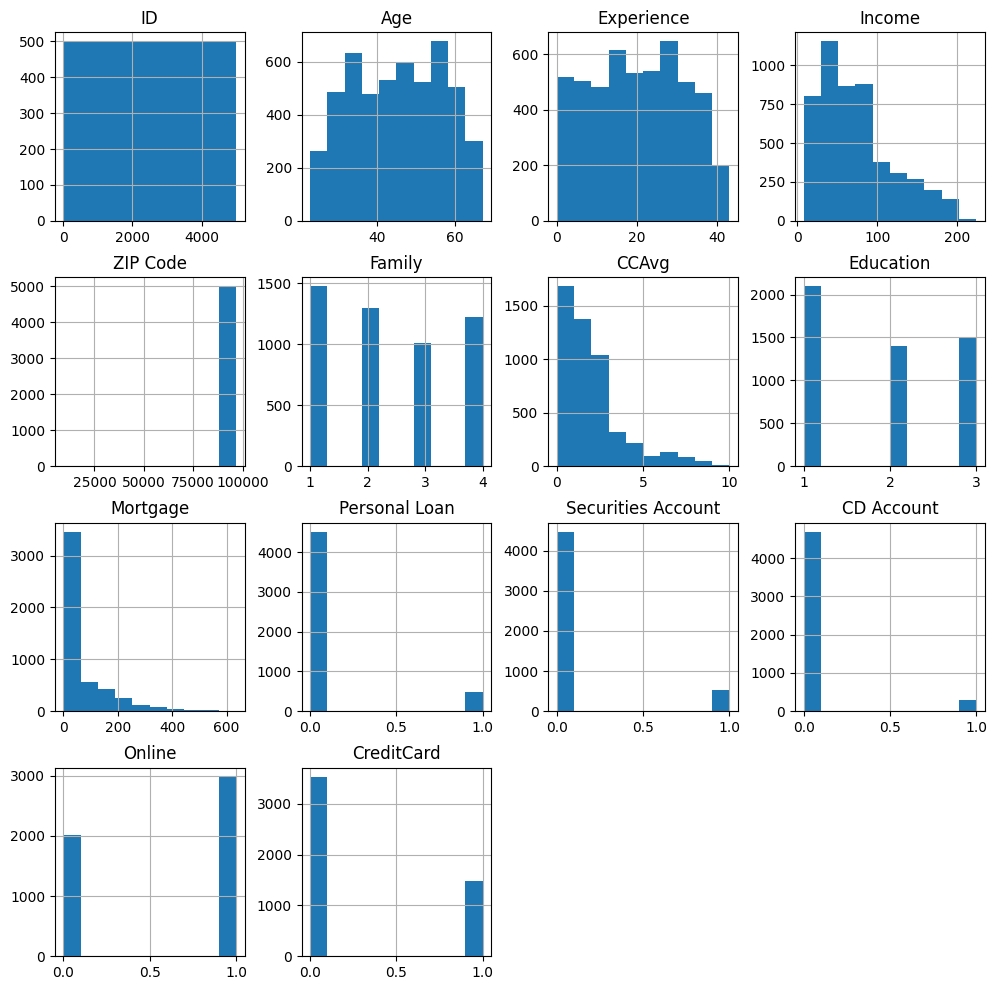

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(12, 12))
plt.show()

In [ ]:
data['Personal Loan'].value_counts()

,count
Personal Loan,
0,4520
1,480


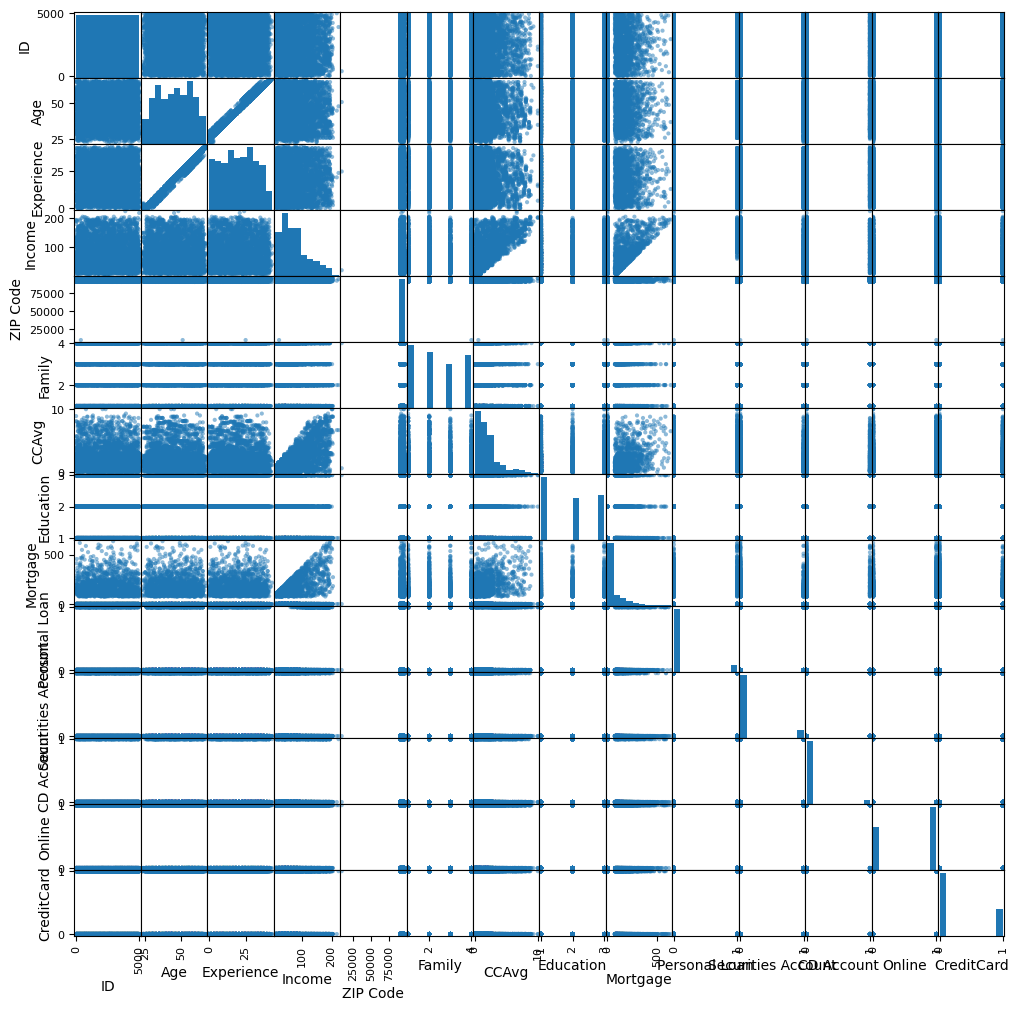

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

splt = scatter_matrix(data, figsize=(12, 12))
plt.show()


In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [ ]:
data.fillna(data.median(), inplace=True)

In [ ]:
df = data.copy()  # Create a copy to avoid modifying the original data
for col in df.columns:
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25

    min_val = q25 - 1.5 * iqr
    max_val = q75 + 1.5 * iqr

    # Removing rows with outliers
    df = df[(df[col] > min_val) & (df[col] < max_val)]

    # Replacing outliers with NaN
    df.loc[(df[col] < min_val) | (df[col] > max_val), col] = pd.NA

    # Print column name and count of NaN values
    print(col, df[col].isna().sum())


ID 0
Age 0
Experience 0
Income 0
ZIP Code 0
Family 0
CCAvg 0
Education 0
Mortgage 0
Personal Loan 0
Securities Account 0
CD Account 0
Online 0
CreditCard 0


In [ ]:
x_df = data.loc[:, data.columns != 'Personal Loan']
y_df = data.loc[:, data.columns == 'Personal Loan']

In [ ]:
x_df.shape

(5000, 13)

In [ ]:
y_df.shape

(5000, 1)

In [ ]:
from sklearn import model_selection

features = x_df
target = y_df

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, target, test_size=test_size, random_state=seed)

In [ ]:
X_train.shape

(3350, 13)

In [ ]:
X_test.shape

(1650, 13)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9309090909090909


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1499
           1       0.66      0.50      0.57       151

    accuracy                           0.93      1650
   macro avg       0.81      0.74      0.77      1650
weighted avg       0.92      0.93      0.93      1650



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_predict)

array([[1460,   39],
       [  75,   76]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predict))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1499
           1       0.66      0.50      0.57       151

    accuracy                           0.93      1650
   macro avg       0.81      0.74      0.77      1650
weighted avg       0.92      0.93      0.93      1650



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(Y_test, predictions))


[[1486   13]
 [ 140   11]]


In [ ]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1499
           1       0.46      0.07      0.13       151

    accuracy                           0.91      1650
   macro avg       0.69      0.53      0.54      1650
weighted avg       0.87      0.91      0.88      1650



# Data Preprocessing for KNN


In [ ]:
from sklearn import preprocessing

In [ ]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[ 1.36145342, -0.73959655, -0.81431333, ..., -0.25264558,
        -1.20964263, -0.64025984],
       [ 1.1984703 ,  1.09803209,  1.20912714, ..., -0.25264558,
        -1.20964263, -0.64025984],
       [-0.44668417, -0.73959655, -0.63836199, ..., -0.25264558,
        -1.20964263,  1.56186589],
       ...,
       [-1.36607617, -0.12705367, -0.02253228, ..., -0.25264558,
         0.82669044, -0.64025984],
       [-0.89036046, -0.38957205, -0.2864593 , ..., -0.25264558,
         0.82669044, -0.64025984],
       [ 1.23468877, -1.78967006, -1.69407006, ..., -0.25264558,
        -1.20964263, -0.64025984]])

In [ ]:
X_test_scaled = preprocessing.scale(X_test)
X_test_scaled

array([[ 0.61976974, -0.2695986 , -0.68557622, ..., -0.25534948,
        -1.23095244,  1.52532387],
       [-1.19614426,  0.59786959,  0.70506628, ..., -0.25534948,
        -1.23095244, -0.65559847],
       [ 0.76921076,  1.1183505 ,  0.70506628, ..., -0.25534948,
        -1.23095244, -0.65559847],
       ...,
       [-1.44155657, -1.48405405, -1.46781262, ..., -0.25534948,
         0.81237907,  1.52532387],
       [ 1.05986668, -1.57080087, -1.55472778, ..., -0.25534948,
         0.81237907, -0.65559847],
       [-1.40111152,  0.25088231,  0.35740566, ..., -0.25534948,
         0.81237907,  1.52532387]])

In [ ]:
model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction_labels = model.predict(X_test_scaled)

In [ ]:
print(metrics.confusion_matrix(Y_test, prediction_labels))

[[1491    8]
 [  63   88]]


In [ ]:
print(metrics.classification_report(Y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1499
           1       0.92      0.58      0.71       151

    accuracy                           0.96      1650
   macro avg       0.94      0.79      0.84      1650
weighted avg       0.96      0.96      0.95      1650



In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.score(X_train_scaled, Y_train)

0.9516417910447761

In [ ]:
y_predict = model.predict(X_test_scaled)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))

0.9309090909090909
[[1471   28]
 [  57   94]]
